<a href="https://colab.research.google.com/github/benvictoria21/AnalyzeStocks/blob/master/Inovio_Pharmaceuticals%2C_Inc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install  yfinance

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance

In [10]:
INO = "INO" 

In [11]:
INO = yfinance.download(INO)

INO

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-12-08,60.000000,60.000000,58.00,59.000000,59.000000,1900
1998-12-09,59.000000,59.000000,57.00,58.000000,58.000000,500
1998-12-10,59.000000,60.000000,57.00,59.000000,59.000000,1400
1998-12-11,58.000000,59.000000,57.00,59.000000,59.000000,900
1998-12-14,59.000000,59.000000,59.00,59.000000,59.000000,1100
...,...,...,...,...,...,...
2020-09-21,16.950001,18.450001,16.50,17.690001,17.690001,33628000
2020-09-22,17.920000,18.690001,16.58,16.980000,16.980000,26992100
2020-09-23,16.209999,17.000000,15.23,15.970000,15.970000,21016600


In [12]:
INO.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-12-08,60.0,60.0,58.0,59.0,59.0,1900
1998-12-09,59.0,59.0,57.0,58.0,58.0,500
1998-12-10,59.0,60.0,57.0,59.0,59.0,1400
1998-12-11,58.0,59.0,57.0,59.0,59.0,900
1998-12-14,59.0,59.0,59.0,59.0,59.0,1100


In [13]:
INO.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-21,16.950001,18.450001,16.50,17.690001,17.690001,33628000
2020-09-22,17.920000,18.690001,16.58,16.980000,16.980000,26992100
2020-09-23,16.209999,17.000000,15.23,15.970000,15.970000,21016600
2020-09-24,14.920000,16.000000,14.50,15.370000,15.370000,13417600
2020-09-25,15.850000,16.959999,15.85,16.940001,16.940001,13498900


In [15]:
INO.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5486.000000,5486.000000,5486.000000,5486.000000,5486.000000,5.486000e+03
mean,12.217539,12.625922,11.715545,12.146721,12.146721,1.488226e+06
std,16.189601,16.859548,15.274786,16.024720,16.024720,8.496107e+06
min,0.720000,0.840000,0.600000,0.640000,0.640000,0.000000e+00
25%,4.240000,4.360000,4.040000,4.200000,4.200000,5.900000e+03
50%,7.465000,7.725000,7.200000,7.435000,7.435000,5.690000e+04
75%,12.270000,12.640000,11.907500,12.317500,12.317500,7.311500e+05
max,192.000000,196.000000,168.000000,191.000000,191.000000,1.951423e+08


In [16]:
INO.info

<bound method DataFrame.info of                  Open       High    Low      Close  Adj Close    Volume
Date                                                                   
1998-12-08  60.000000  60.000000  58.00  59.000000  59.000000      1900
1998-12-09  59.000000  59.000000  57.00  58.000000  58.000000       500
1998-12-10  59.000000  60.000000  57.00  59.000000  59.000000      1400
1998-12-11  58.000000  59.000000  57.00  59.000000  59.000000       900
1998-12-14  59.000000  59.000000  59.00  59.000000  59.000000      1100
...               ...        ...    ...        ...        ...       ...
2020-09-21  16.950001  18.450001  16.50  17.690001  17.690001  33628000
2020-09-22  17.920000  18.690001  16.58  16.980000  16.980000  26992100
2020-09-23  16.209999  17.000000  15.23  15.970000  15.970000  21016600
2020-09-24  14.920000  16.000000  14.50  15.370000  15.370000  13417600
2020-09-25  15.850000  16.959999  15.85  16.940001  16.940001  13498900

[5486 rows x 6 columns]>

In [17]:
INO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5486 entries, 1998-12-08 to 2020-09-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5486 non-null   float64
 1   High       5486 non-null   float64
 2   Low        5486 non-null   float64
 3   Close      5486 non-null   float64
 4   Adj Close  5486 non-null   float64
 5   Volume     5486 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 300.0 KB


In [18]:
import sqlite3

In [19]:
conn = sqlite3.connect("INO.db")
c = conn.cursor()

In [20]:
conn = sqlite3.connect("INO.db")
c = conn.cursor()

In [21]:
INO.to_sql("INO", conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [22]:
#See data
c.execute("""SELECT * FROM INO""")
rows = c.fetchall()
rows

[('1998-12-08 00:00:00', 60.0, 60.0, 58.0, 59.0, 59.0, 1900),
 ('1998-12-09 00:00:00', 59.0, 59.0, 57.0, 58.0, 58.0, 500),
 ('1998-12-10 00:00:00', 59.0, 60.0, 57.0, 59.0, 59.0, 1400),
 ('1998-12-11 00:00:00', 58.0, 59.0, 57.0, 59.0, 59.0, 900),
 ('1998-12-14 00:00:00', 59.0, 59.0, 59.0, 59.0, 59.0, 1100),
 ('1998-12-15 00:00:00', 58.0, 58.0, 50.0, 54.0, 54.0, 4100),
 ('1998-12-16 00:00:00', 54.0, 56.0, 53.0, 55.0, 55.0, 200),
 ('1998-12-17 00:00:00', 53.0, 56.0, 53.0, 56.0, 56.0, 500),
 ('1998-12-18 00:00:00', 56.0, 56.0, 56.0, 56.0, 56.0, 1000),
 ('1998-12-21 00:00:00', 56.0, 56.0, 50.0, 52.0, 52.0, 3000),
 ('1998-12-22 00:00:00', 52.0, 52.0, 52.0, 52.0, 52.0, 700),
 ('1998-12-23 00:00:00', 52.0, 54.0, 50.0, 52.0, 52.0, 2300),
 ('1998-12-24 00:00:00', 52.0, 52.0, 52.0, 52.0, 52.0, 0),
 ('1998-12-28 00:00:00', 54.0, 56.0, 53.0, 55.0, 55.0, 1400),
 ('1998-12-29 00:00:00', 53.0, 53.0, 49.0, 52.0, 52.0, 3300),
 ('1998-12-30 00:00:00', 52.0, 52.0, 52.0, 52.0, 52.0, 700),
 ('1998-12-31 00:

In [23]:
INO.to_excel("INO.xls")

pd.read_excel("INO.xls")

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-12-08,60.000000,60.000000,58.00,59.000000,59.000000,1900
1,1998-12-09,59.000000,59.000000,57.00,58.000000,58.000000,500
2,1998-12-10,59.000000,60.000000,57.00,59.000000,59.000000,1400
3,1998-12-11,58.000000,59.000000,57.00,59.000000,59.000000,900
4,1998-12-14,59.000000,59.000000,59.00,59.000000,59.000000,1100
...,...,...,...,...,...,...,...
5481,2020-09-21,16.950001,18.450001,16.50,17.690001,17.690001,33628000
5482,2020-09-22,17.920000,18.690001,16.58,16.980000,16.980000,26992100
5483,2020-09-23,16.209999,17.000000,15.23,15.970000,15.970000,21016600
5484,2020-09-24,14.920000,16.000000,14.50,15.370000,15.370000,13417600


findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


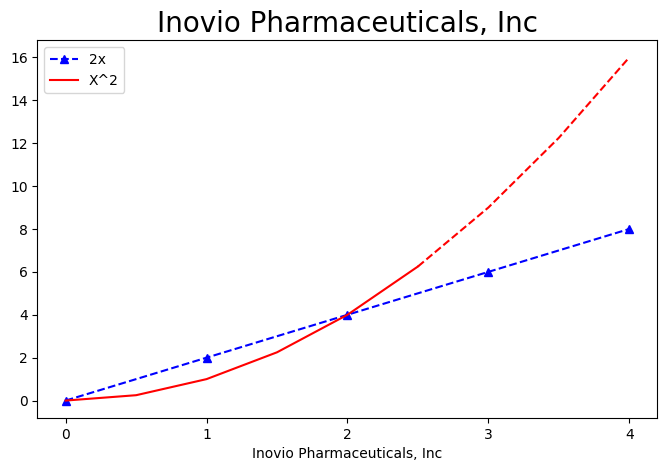

In [24]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('Inovio Pharmaceuticals, Inc', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Inovio Pharmaceuticals, Inc')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

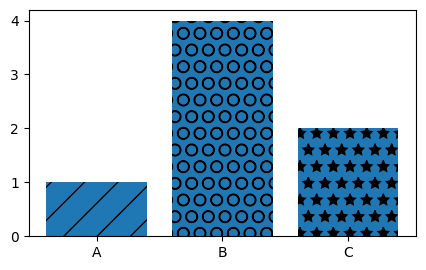

In [25]:
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)

patterns = ['/', 'O', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.savefig('barchart.png', dpi=300)

plt.show()